# Gerekli kütüphaneler

In [99]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Veriseti yüklemesi

In [100]:
df = pd.read_csv('data_banknote_authentication.csv', sep=';')

# Veriye ilk bakış

In [101]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   object 
 1   skewness  1372 non-null   object 
 2   curtosis  1372 non-null   object 
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 53.7+ KB
None


Veriseti elemanları hakkında genel bilgi.

In [102]:
print(df.shape)

(1372, 5)


Veriseti kaç sütun ve kaç satırdan oluşuyor.

In [103]:
print(df.head())

  variance skewness curtosis   entropy  class
0   36.216   86.661  -28.073  -0.44699      0
1   45.459   81.674  -24.586 -14.62100      0
2    3.866  -26.383   19.242   0.10645      0
3   34.566   95.228  -40.112 -35.94400      0
4  0.32924  -44.552   45.718  -0.98880      0


Verisetinin ilk 5 satırını gösterir.

In [104]:
print(df.tail())

     variance  skewness curtosis   entropy  class
1367  0.40614    13.492  -14.501  -0.55949      1
1368  -13.887   -48.773   64.774   0.34179      1
1369  -37.503  -134.586  175.932 -27.77100      1
1370  -35.637   -83.827   12.393 -12.82300      1
1371  -25.419  -0.65804   26.842  11.95200      1


Verisetinin son 5 satırını gösterir.

In [105]:


df.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'y']

for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


Object olarak gözüken değişkenleri sayısal ifadeye çeviriyoruz. (İleride daha kolay işlem yapabilmek için)

In [106]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1369 non-null   float64
 1   skewness  1360 non-null   float64
 2   curtosis  1365 non-null   float64
 3   entropy   1372 non-null   float64
 4   y         1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None


Sayısal ifadeye çevirdiğimiz değişkenleri kontrol eder.

# 2. Veri Setinin Betimlenmesi

In [ ]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
variance,1369.0,3.837445,26.879868,-70.421,-15.8510,0.48797,25.58100,68.248
skewness,1360.0,17.494898,56.002524,-137.731,-6.6755,15.14700,61.71075,129.516
curtosis,1365.0,12.339244,41.143078,-52.861,-13.7210,0.57722,27.74200,179.274
entropy,1372.0,-11.475199,20.218128,-85.482,-21.9780,-0.58665,0.39481,24.495
y,1372.0,0.444606,0.497103,0.000,0.0000,0.00000,1.00000,1.000


Eksik gözlemleri göz ardı eder ve verisetindeki değerlerin temel istatistiksel özellikleri analiz eder.

# 3. Eksik Değerlerin İncelenmesi

In [49]:
df.isnull().values.any()

np.True_

Eksik veri var mı ?

In [50]:
df.isnull().sum()

variance     3
skewness    12
curtosis     7
entropy      0
y            0
dtype: int64

Hangi değişkende kaç tane eksik veri var?

In [108]:
df = df.dropna() 

Eksik veri sayısının toplam veri sayısına oranı çok küçük olduğu için eksik veri bulunan satırların silinmesi tercih edildi.

In [109]:
df.isnull().values.any() # temizlik sonrası eksik veri var mı

np.False_

Silme işlemi sonrasında tekrar eksik veri kontrolü yapıldı.

In [110]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
variance,1350.0,3.767649,26.901019,-70.364,-15.9325,0.417220,25.545000,68.248
skewness,1350.0,17.726523,55.989011,-137.731,-6.5720,15.799000,61.944000,129.516
curtosis,1350.0,12.489055,41.173270,-52.861,-13.6590,0.615345,27.805750,179.274
entropy,1350.0,-11.507259,20.179100,-85.482,-21.9780,-0.588590,0.394487,21.625
y,1350.0,0.448148,0.497488,0.000,0.0000,0.000000,1.000000,1.000


Silme işlemi sonrasında tekrar değişkenlerin temel istatistiksel özellikleri analiz edildi.

# Veri görselleştirme

<Axes: ylabel='y'>

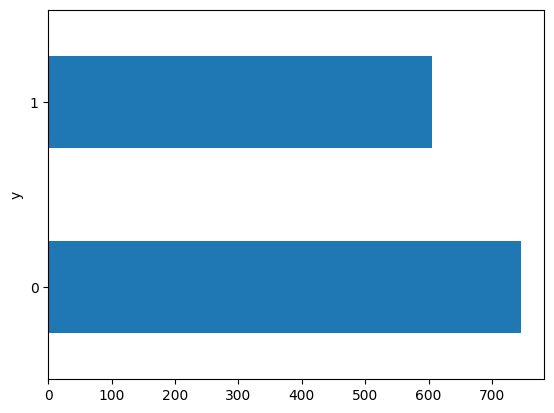

In [66]:
df["y"].value_counts().plot.barh() # diğer grafikler çok karışık

# 5. Değişken Özetleri

In [75]:
print("Ortalama: " + str(df["y"].mean()))
print("Dolu Gözlem Sayısı: " + str(df["y"].count())) 
print("Maksimum Değer: " + str(df["y"].max()))
print("Minimum Değer: " + str(df["y"].min()))
print("Medyan: " + str(df["y"].median()))
print("Standart Sapma: " + str(df["y"].std()))

Ortalama: 0.44814814814814813
Dolu Gözlem Sayısı: 1350
Maksimum Değer: 1
Minimum Değer: 0
Medyan: 0.0
Standart Sapma: 0.49748840677744616


# 6. Dağılım Grafikleri

In [37]:
# ordinal tanımlama
from pandas.api.types import CategoricalDtype

In [79]:
df.variance.head()

0    36.21600
1    45.45900
2     3.86600
3    34.56600
4     0.32924
Name: variance, dtype: float64

In [ ]:
# variance isimli değişkeni ordinal olarak tanımlama
df.variance = df.variance.astype(CategoricalDtype (ordered=True))

In [80]:
df.dtypes   

variance    float64
skewness    float64
curtosis    float64
entropy     float64
y             int64
dtype: object

# 6. Barplot (sütun grafik)

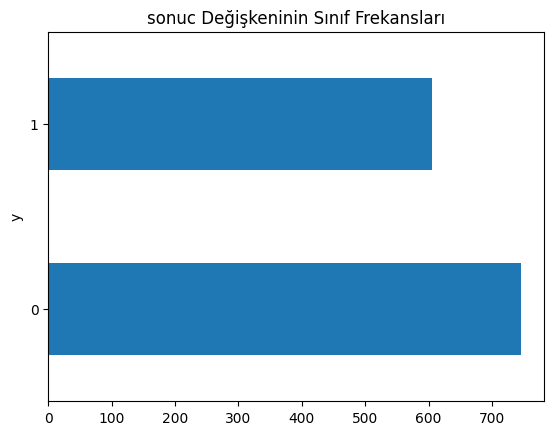

In [84]:
df["y"].value_counts().plot.barh().set_title("sonuc Değişkeninin Sınıf Frekansları");

# 6.1.1

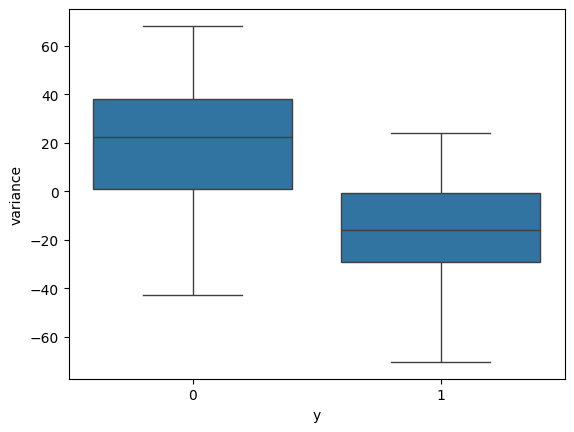

In [85]:
sns.boxplot(x=df["y"], y=df["variance"]);

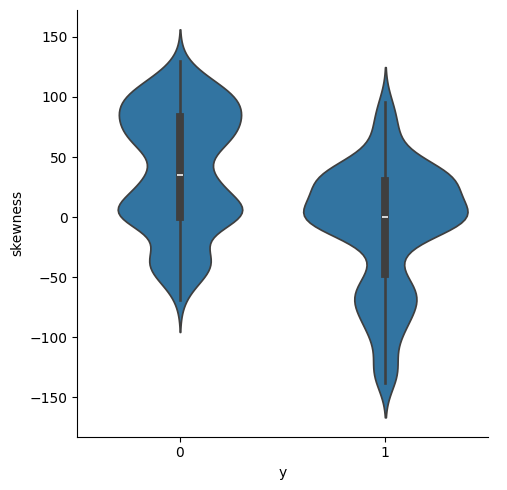

In [87]:
sns.catplot(x="y", y="skewness", kind="violin", data=df);

# 7. kolerasyon haritasi

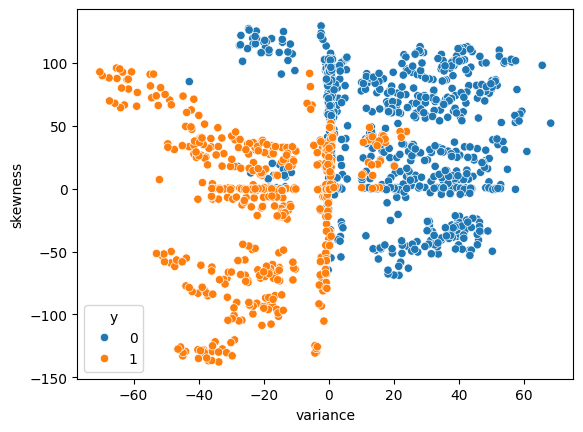

In [90]:
sns.scatterplot(x=df["variance"], y=df["skewness"], hue=df["y"]);

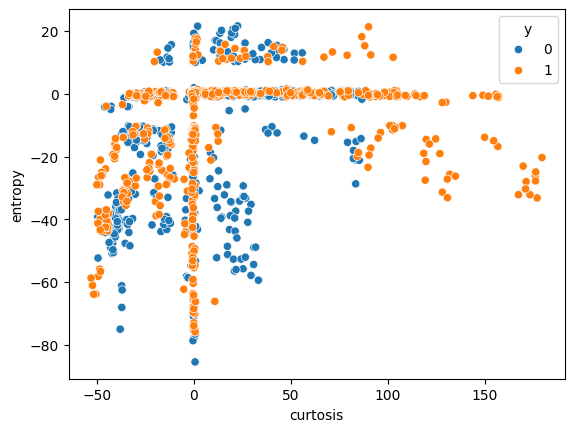

In [91]:
sns.scatterplot(x="curtosis", y="entropy", hue="y", data=df);

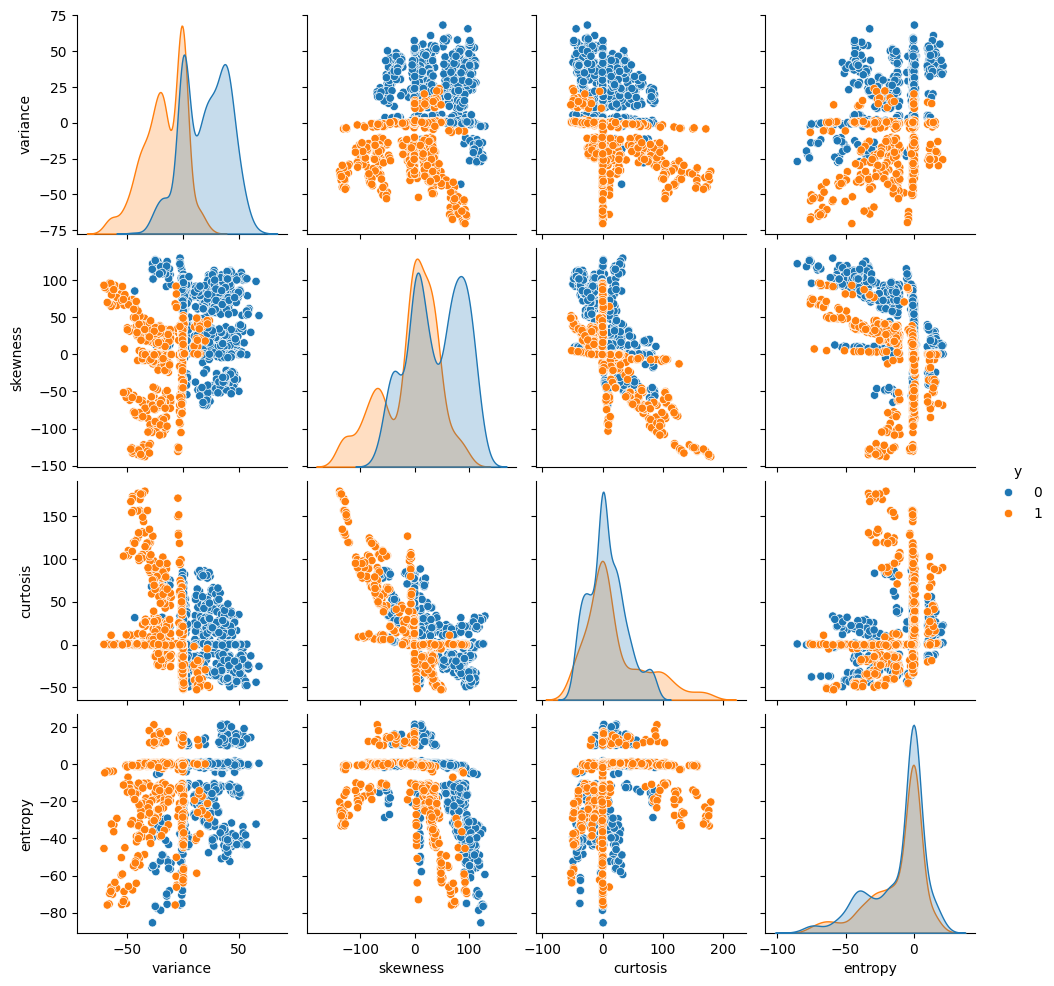

In [92]:
sns.pairplot(df, hue="y")

not: bu şekilde ayrık kümelenmelerin sebeplerini de görmüş oluruz

# 7.3 Heat map (ısı haritası)

<Axes: >

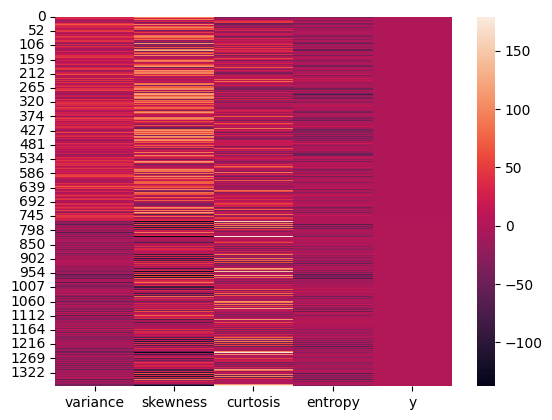

In [93]:
sns.heatmap(df)

# veri bilimi için istatistik

# 1. örneklem alma